In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

%matplotlib inline

# importing data and understanding statistics of data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57033 entries, 0 to 57032
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     37726 non-null  float64
 1   sampling_date                57033 non-null  object 
 2   state                        57033 non-null  object 
 3   location                     57033 non-null  object 
 4   agency                       37135 non-null  object 
 5   type                         56039 non-null  object 
 6   so2                          51843 non-null  float64
 7   no2                          55333 non-null  float64
 8   rspm                         54196 non-null  float64
 9   spm                          24807 non-null  float64
 10  location_monitoring_station  54431 non-null  object 
 11  pm2_5                        0 non-null      float64
 12  date                         57032 non-null  object 
dtypes: float64(6), o

In [5]:
df.describe()

,stn_code,so2,no2,rspm,spm,pm2_5
count,37726.000000,51843.000000,55333.000000,54196.000000,24807.000000,0.0
mean,452.586254,7.231622,19.443599,87.934604,195.513266,NaN
std,184.963445,6.855290,11.451365,50.398833,107.049121,NaN
min,44.000000,0.400000,0.500000,2.000000,0.000000,NaN
25%,264.000000,4.000000,12.200000,54.000000,123.000000,NaN
50%,519.000000,5.800000,16.000000,77.000000,177.000000,NaN
75%,585.000000,8.000000,24.000000,109.000000,248.000000,NaN
max,788.000000,228.000000,334.900000,790.000000,1752.000000,NaN


# Exploratory Data Analysis

In [6]:
df.corr()

,stn_code,so2,no2,rspm,spm,pm2_5
stn_code,1.000000,-0.191395,-0.364109,-0.148916,-0.221092,NaN
so2,-0.191395,1.000000,0.374600,0.106776,0.197339,NaN
no2,-0.364109,0.374600,1.000000,0.246834,0.362660,NaN
rspm,-0.148916,0.106776,0.246834,1.000000,0.820282,NaN
spm,-0.221092,0.197339,0.362660,0.820282,1.000000,NaN
pm2_5,NaN,NaN,NaN,NaN,NaN,NaN


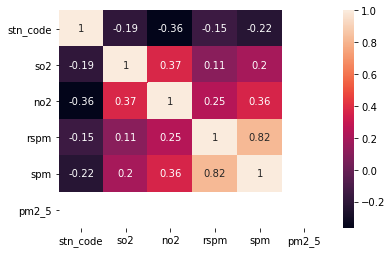

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.isna().sum(axis=0)

stn_code                       19307
sampling_date                      0
state                              0
location                           0
agency                         19898
type                             994
so2                             5190
no2                             1700
rspm                            2837
spm                            32226
location_monitoring_station     2602
pm2_5                          57033
date                               1
dtype: int64

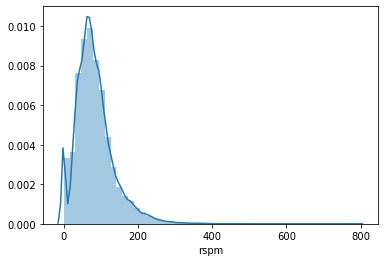

In [9]:
sns.distplot(df['rspm'].fillna(0))

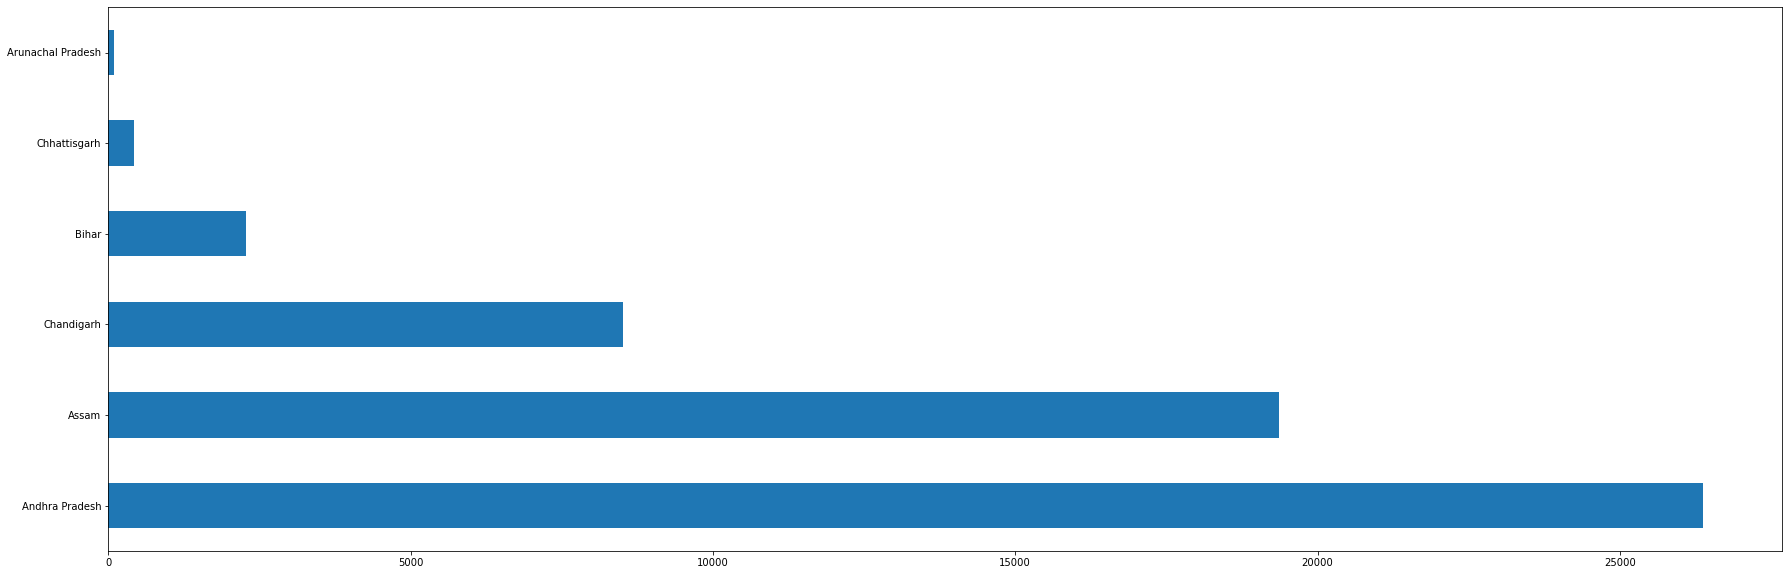

In [10]:
#number of data points for each state
df['state'].value_counts().plot(kind='barh',figsize=(30,10))

# Predictive modelling for rspm in Delhi,inspired by recent air pollution concerns in Delhi

In [20]:
new_df=df.loc[df['state'] == "Bihar"]
new_df = new_df.fillna(0)
print(new_df.shape)
new_df.head()

(2275, 13)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
45819,46.0,30-03-87,Bihar,Sindri,Bihar Pollution Control Board,Industrial,66.7,30.4,0.0,451.0,0,0.0,1987-03-30
45820,45.0,24-03-87,Bihar,Jharia,Bihar Pollution Control Board,Industrial,47.2,32.8,0.0,514.0,0,0.0,1987-03-24
45821,44.0,3/9/1987,Bihar,Dhanbad,Bihar Pollution Control Board,Residential,0.0,30.5,0.0,172.0,0,0.0,1987-09-03
45822,45.0,13-04-87,Bihar,Jharia,Bihar Pollution Control Board,Industrial,41.7,48.6,0.0,621.0,0,0.0,1987-04-13
45823,44.0,4/10/1987,Bihar,Dhanbad,Bihar Pollution Control Board,Residential,23.6,21.0,0.0,227.0,0,0.0,1987-10-04


In [21]:
X = new_df[['so2','no2']]
y = new_df['rspm']
X.shape ,y.shape

((2275, 2), (2275,))

In [22]:
#splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [23]:
# training linear regression model
regressor = LinearRegression()
regmodel=regressor.fit(X_train, y_train)
regmodel

LinearRegression()

In [24]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([  68.07535494,  113.64738793,  143.9557043 ,   70.99726473,
         66.76093801,   42.1221172 ,  142.95178146,   34.34980441,
         26.51265494,   69.7257032 ,  110.86109467,   82.33487195,
         87.15679695,  129.83926929,   15.32186246,  149.86753972,
         65.08211174,   81.22754334,   59.78836212,  122.0668181 ,
        -40.58620375,   87.2390518 ,   71.14006995,  108.77514205,
        104.55333111,  133.23258853,   57.29569833,  102.83469023,
         88.69267961,   78.76266561,  100.54109573,   65.95111   ,
         80.54876878,   70.83303181,   41.26459393,   64.62134694,
        138.52246702,   68.93287821,  -47.92374253,   96.4550397 ,
        109.42156747,   89.19312063,  130.6289151 ,   87.04634087,
         36.22465917,   68.83265162,   25.16588887,   82.47767717,
         18.08672803,   83.02788552,  103.18831651,   60.56418409,
         73.26196605,   78.72672212,   66.59311074,   90.82922988,
        117.55884316,   78.72672212,   26.42044739,   81.22754

In [25]:
# Analysis of results and model evaluation

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 45.64442219554287
MSE: 3951.9745649394504
RMSE: 62.86473228241293


In [27]:
print('Score: %.2f' % regressor.score(X, y))

Score: 0.31


# saving the model and making predictions

In [28]:
#load the saved regression model
import pickle
filename = 'LinearRegression_model.sav'
pickle.dump(regressor, open(filename, 'wb'))